<a href="https://colab.research.google.com/github/laura27241/trabalhoMachineLearning/blob/main/projetoFinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
print(df['Outcome'].value_counts())
print(df.describe())

Outcome
0    500
1    268
Name: count, dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.7602

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


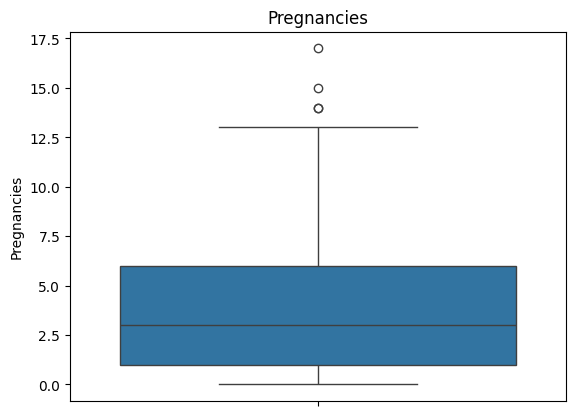

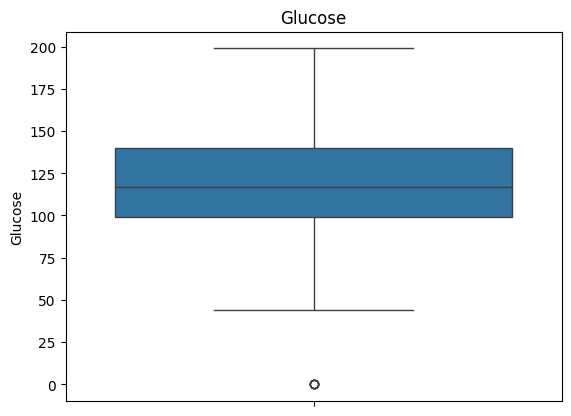

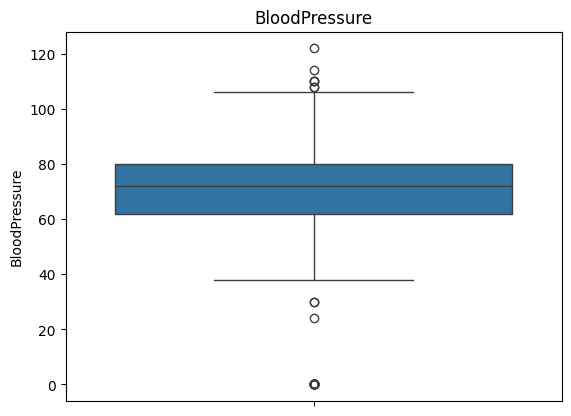

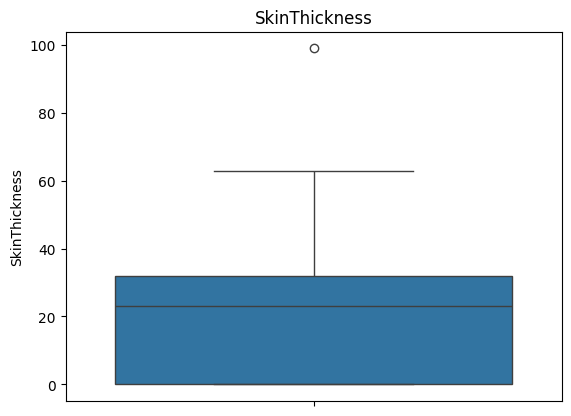

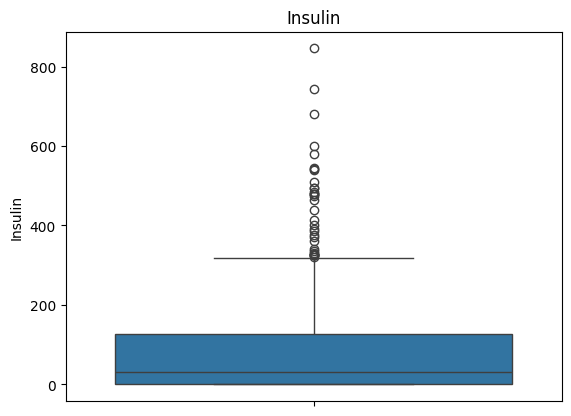

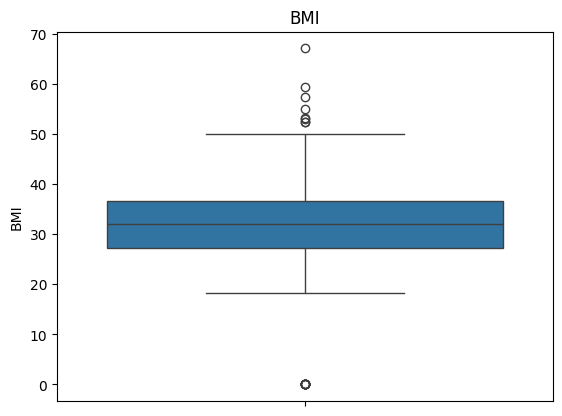

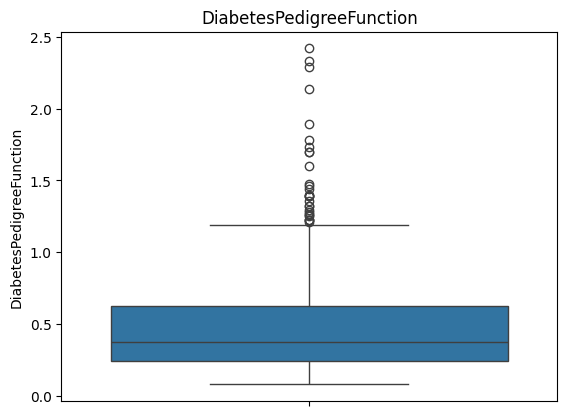

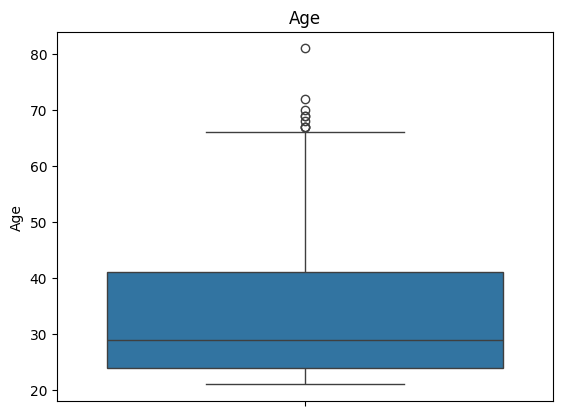

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns[:-1]:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
df = pd.get_dummies(df, drop_first=True)


Escalonamento de dados por padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

pregnancies
scaler = StandardScaler()
pregnanciesReshaped = scaler.fit_transform(pregnancies.reshape(-1,1))

NameError: name 'pregnancies' is not defined

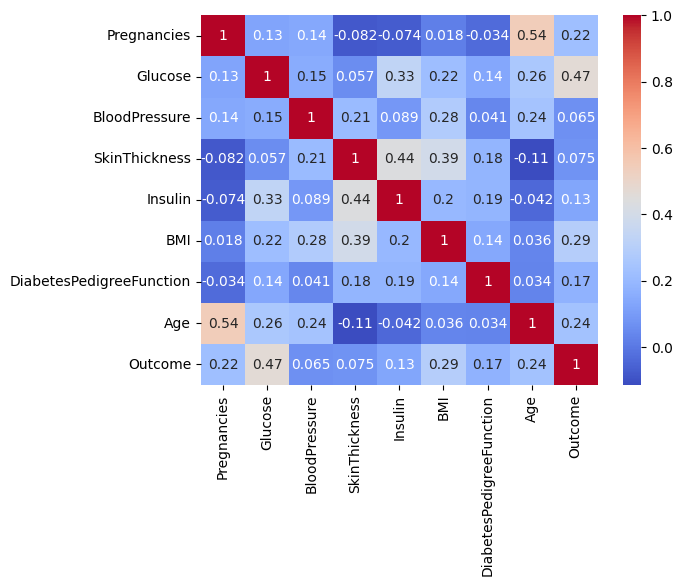

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [ ]:
print(y_train.value_counts(normalize=True))

Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64


Identificação da melhor confguração:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)


Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
y_pred_rf = best_rf.predict(X_test)
print("Acurácia RF:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação RF:\n", classification_report(y_test, y_pred_rf))

Acurácia RF: 0.7597402597402597
Relatório de Classificação RF:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
from sklearn.svm import SVC

param_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

svc = SVC(random_state=42)
grid_svc = GridSearchCV(estimator=svc, param_grid=param_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

best_svc = grid_svc.best_estimator_
print("Melhores parâmetros para SVM:", grid_svc.best_params_)

Melhores parâmetros para SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
y_pred_svc = best_svc.predict(X_test)
print("Acurácia SVM:", accuracy_score(y_test, y_pred_svc))
print("Relatório de Classificação SVM:\n", classification_report(y_test, y_pred_svc))

**Com base nos resultados de acurácia e precisão, o método Random Forest é a opção mais apropriado.**


***Avaliação do desempenho - Classificação***

In [ ]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Métricas de Desempenho para Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

Métricas de Desempenho para Random Forest:


NameError: name 'accuracy_score' is not defined

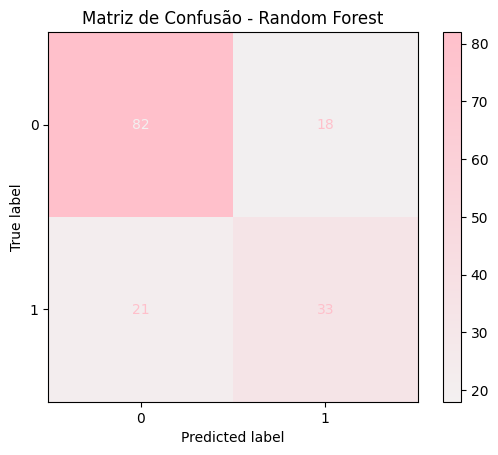

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
sns.set_palette("pink")
disp_rf.plot(cmap=sns.light_palette("pink", as_cmap=True))
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [ ]:
print("Métricas de Desempenho para SVM:")
print("Acurácia:", accuracy_score(y_test, y_pred_svc))
print("Precisão:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1-Score:", f1_score(y_test, y_pred_svc))

Métricas de Desempenho para SVM:
Acurácia: 0.7207792207792207
Precisão: 0.6222222222222222
Recall: 0.5185185185185185
F1-Score: 0.5656565656565656


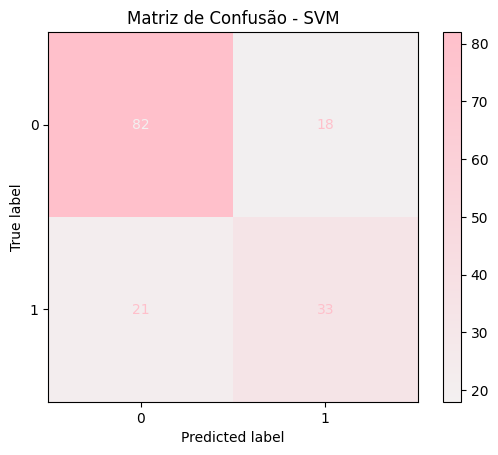

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=best_svc.classes_)
sns.set_palette("pink")
disp_rf.plot(cmap=sns.light_palette("pink", as_cmap=True))
plt.title("Matriz de Confusão - SVM")
plt.show()

In [ ]:
!pip install flask
!pip install flask-ngrok
!pip install flask flask-ngrok scikit-learn pandas
!pip install pyngrok

In [ ]:
!ngrok authtoken 2pJeT9vT19EBuZRMSR36TN0kmJl_2tx5PBs3jC17dKTRsMUTY

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

app = Flask(__name__)

ngrok_tunnel = ngrok.connect(5000)
print(f" * ngrok tunnel 'http://127.0.0.1:5000' -> {ngrok_tunnel}")

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

df = pd.read_csv(url, header=None)

df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

X = df.drop(columns=['Outcome'])
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    input_data = pd.DataFrame(data, index=[0])


    input_data_scaled = scaler.transform(input_data)

    prediction = model.predict(input_data_scaled)

    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(port=5000)


 * ngrok tunnel 'http://127.0.0.1:5000' -> NgrokTunnel: "https://1b8f-34-16-241-233.ngrok-free.app" -> "http://localhost:5000"
Acurácia do modelo: 75.97%
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [26/Nov/2024 22:21:07] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Nov/2024 22:26:19] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Nov/2024 22:26:25] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Nov/2024 22:26:32] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Nov/2024 22:26:43] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Nov/2024 22:26:58] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Nov/2024 22:28:38] "POST /predict HTTP/1.1" 200 -
